# Extracting insights from a football events dataset and creating a match outcome prediction model


---

by Skander Chouchene

---







# Importing libraries and data manipulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns  #advanced visualization library
import requests, zipfile, io
import warnings
from matplotlib.colors import ListedColormap
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/drive/My Drive/Football events/events.csv')

In [4]:
data.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [5]:
missing_percentage=(data.isna().sum()/len(data)).sort_values(ascending=False)
missing_percentage

player_in        0.945043
player_out       0.945019
event_type2      0.772273
shot_place       0.758282
shot_outcome     0.757178
situation        0.756499
bodypart         0.756448
player2          0.690428
location         0.503653
player           0.064824
id_event         0.000000
sort_order       0.000000
time             0.000000
text             0.000000
event_type       0.000000
fast_break       0.000000
side             0.000000
event_team       0.000000
opponent         0.000000
is_goal          0.000000
assist_method    0.000000
id_odsp          0.000000
dtype: float64

# I/ Teams

 ### 1) Attacking side

#### Question 1: Which teams are the best at scoring and converting chances ?

In [8]:
total_goals=pd.DataFrame(data.groupby(['event_team'])['is_goal'].agg("sum").sort_values().iloc[::-1])
total_chances=pd.DataFrame(data[data["event_type"]==1].groupby(['event_team'])['event_type'].agg("sum").sort_values().iloc[::-1])

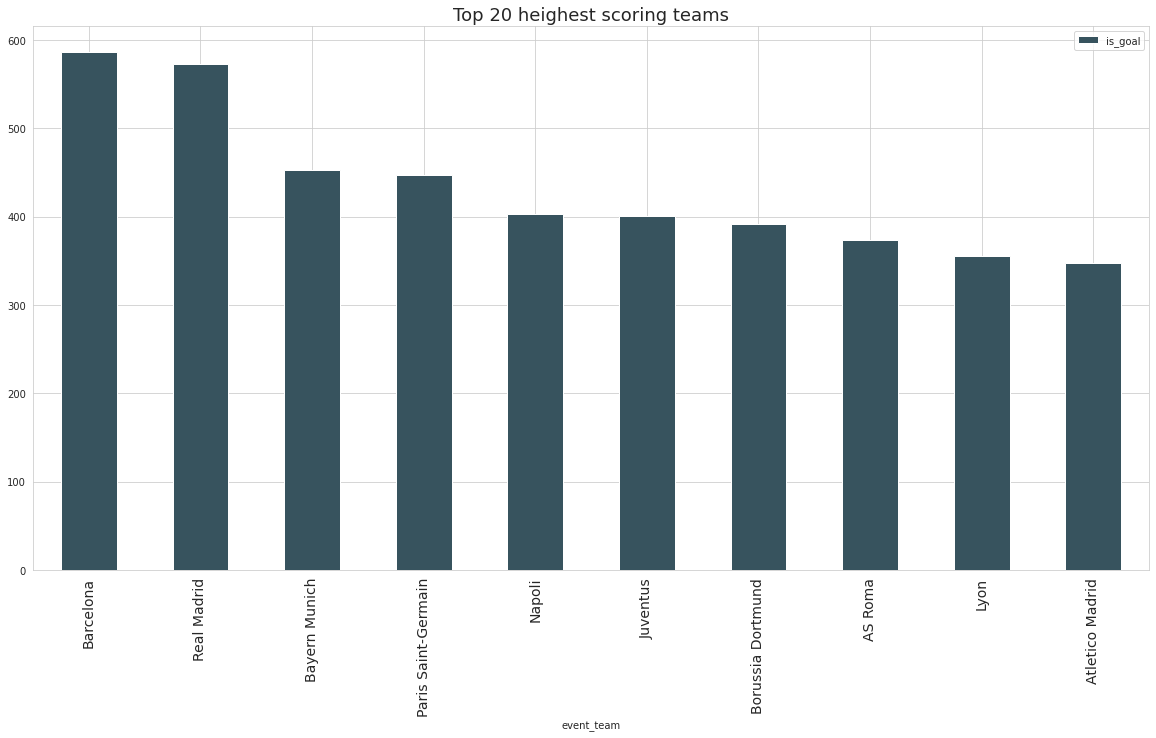

In [9]:
total_goals.iloc[:10].plot(kind='bar',figsize =(20,10))
plt.title("Top 20 heighest scoring teams",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

In [10]:
total_chances=total_chances.reindex(index=total_goals.index)
conversion_ratio=(total_goals["is_goal"]/total_chances["event_type"]).sort_values().iloc[::-1]

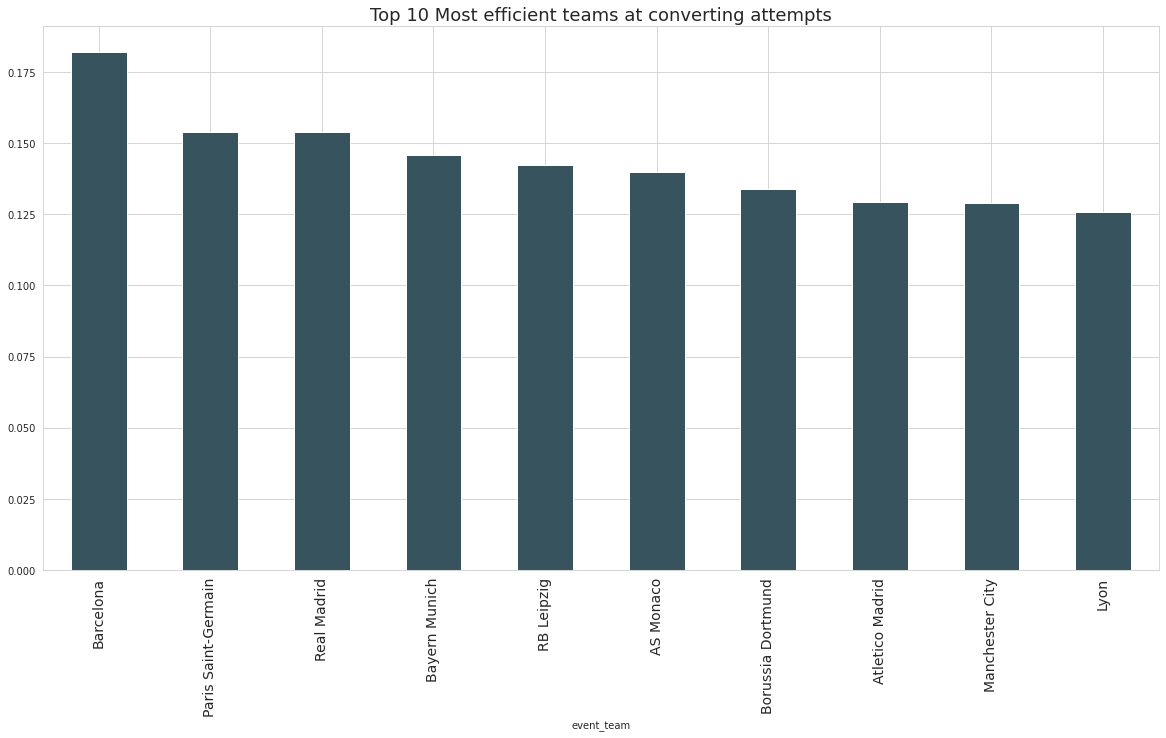

In [11]:
conversion_ratio.iloc[:10].plot(kind='bar',figsize =(20,10))
plt.title("Top 10 Most efficient teams at converting attempts",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

Unsurprisingly, Barcelona, Real Madrid and Bayern Munich are at the top of the goal scoring sheets and the scoring efficiency.\
However, PSG jumps higher on the conversion rate, due to its strong offensive line.

#### Question 2: Comparing assist methods

In [12]:
assist_types={1:"Pass", 2:	"Cross", 3:	"Headed pass", 4:	"Through ball"}
assist_counts=pd.DataFrame(data[data["is_goal"]==1]["assist_method"].value_counts())

In [13]:
assist_counts.drop(0,inplace=True)
assist_counts["assist_type"]=[assist_types[t] for t in assist_counts.index]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

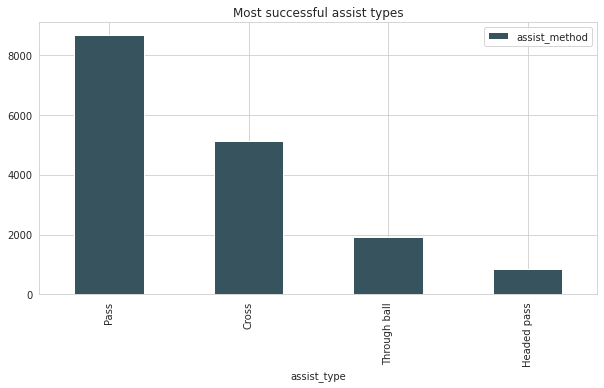

In [14]:
assist_counts.plot(x="assist_type" , y="assist_method",kind="bar", figsize=(10,5), title="Most successful assist types")
plt.xticks(fontsize=10)


### 2) Defensive side

#### Question 3: Which teams are the worst at defending?

In [15]:
goals_conceded=pd.DataFrame(data.groupby(['opponent'])['is_goal'].agg("sum").sort_values().iloc[::-1])

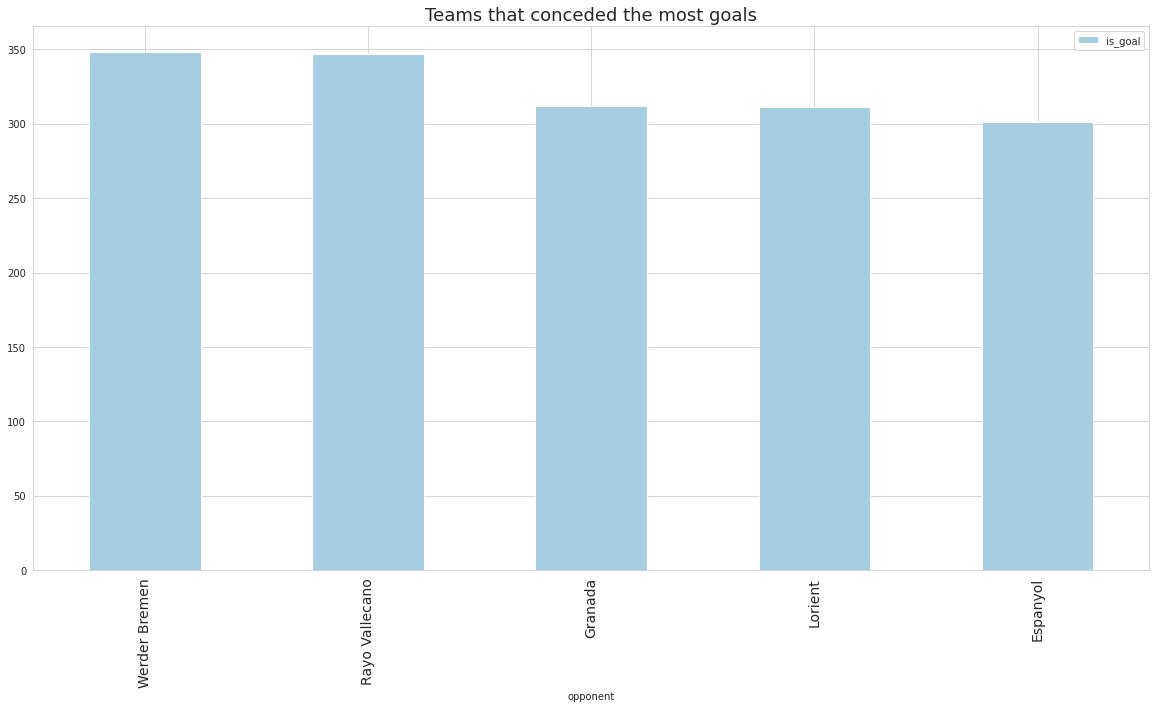

In [16]:
goals_conceded.iloc[:5].plot(kind='bar',figsize =(20,10),colormap="Paired")
plt.title("Teams that conceded the most goals",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

#### Question 4: What are the most violent teams?

In [17]:
yellow=data[data["event_type"]==4]
red=data[data["event_type"]==6]

In [18]:
yellow_teams=pd.DataFrame(yellow["event_team"].value_counts())
red_teams=pd.DataFrame(red["event_team"].value_counts())

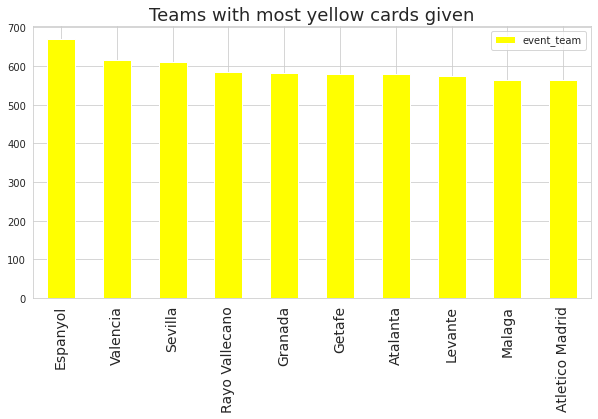

In [19]:
yellow_teams.iloc[:10].plot(kind="bar", figsize=(10,5),color="yellow")
plt.title("Teams with most yellow cards given",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

It comes as no surprise that 9 out of the 10 teams that have gotten the most yellow cards are La Liga teams.\
What is surprising though is that Atletico Madrid is not the first!

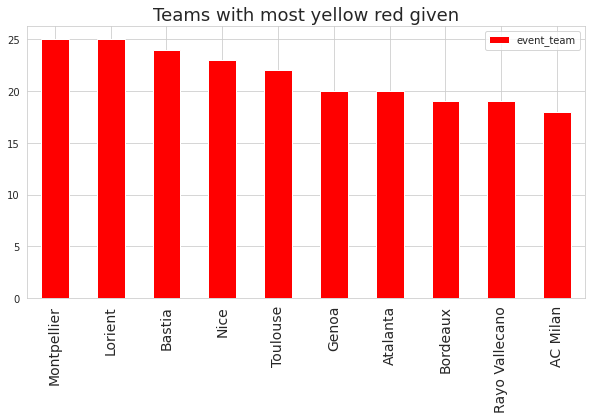

In [20]:
red_teams.iloc[:10].plot(kind="bar", figsize=(10,5),color="red")
plt.title("Teams with most yellow red given",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

# II/ Players

#### Question 5: Who are the best scorers and best chance converters?

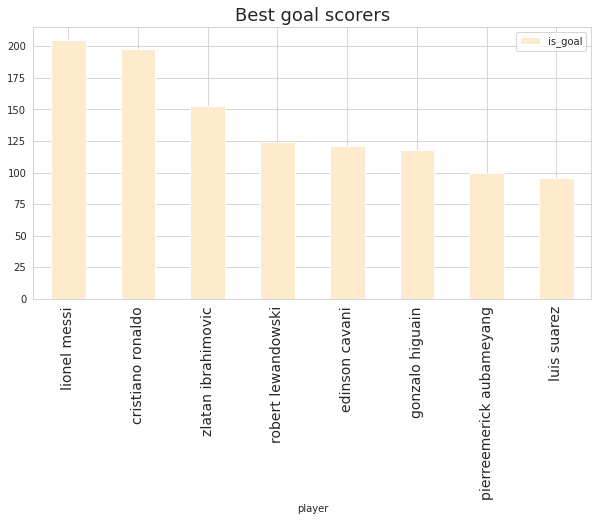

In [21]:
scorers=pd.DataFrame(data.groupby(['player'])['is_goal'].agg("sum").sort_values().iloc[::-1])
my_cmap = my_cmap = ListedColormap(sns.color_palette("OrRd",8))
scorers.iloc[:8].plot(kind="bar", figsize=(10,5),cmap=my_cmap)
plt.title("Best goal scorers", fontsize=18)
plt.xticks(fontsize=14)
plt.show()

Again, Ronaldo and Messi are the usual outliers. Zlatan and Lewa come behind.\
It's also nice to see Aubameyang on the list.\
Now we will look for the best converters out of these goal scorers

In [22]:
total_chances=pd.DataFrame(data[data["event_type"]==1].groupby(['player'])['event_type'].agg("sum").sort_values().iloc[::-1])
total_chances=total_chances.reindex(index=scorers.index)
conversion_ratio=(scorers["is_goal"]/total_chances["event_type"])

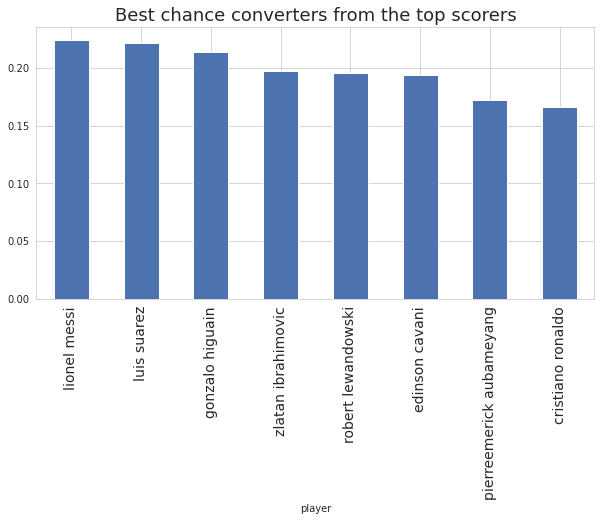

In [23]:
my_cmap = my_cmap = ListedColormap(sns.color_palette("deep",8))
conversion_ratio.iloc[:8].sort_values().iloc[::-1].plot(kind="bar", figsize=(10,5),cmap=my_cmap)
plt.title("Best chance converters from the top scorers", fontsize=18)
plt.xticks(fontsize=14)
plt.show()

#### Question 6: Who are the most violent players?

In [24]:
yellow_players=pd.DataFrame(yellow["player"].value_counts())

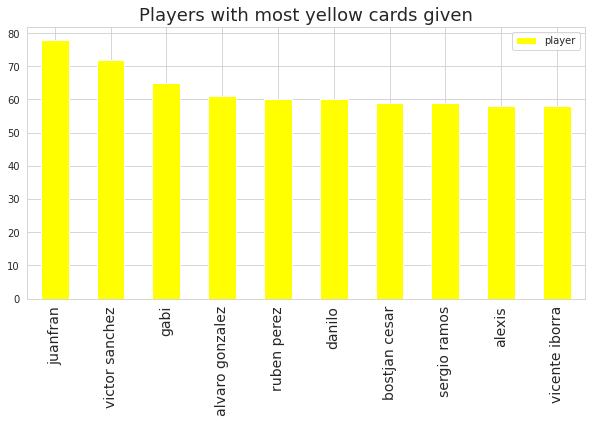

In [25]:
yellow_players.iloc[:10].plot(kind="bar", figsize=(10,5),color="yellow")
plt.title("Players with most yellow cards given",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

# III/ Predicting match results

## 1) Creating a match score dataset

In [26]:
scores=pd.DataFrame(data.groupby(['id_odsp','event_team'])['is_goal'].agg("sum"))

In [27]:
scores.reset_index(inplace=True)

In [28]:
scores.head()

,id_odsp,event_team,is_goal
0,004f4ING/,Southampton,0
1,004f4ING/,Swansea,1
2,00LMl81F/,AC Milan,3
3,00LMl81F/,AS Roma,2
4,00OX4xFp/,AS Monaco,0


In [29]:
teams=data["event_team"].unique()

In [30]:
one_hot_teams=pd.get_dummies(teams)

In [31]:
home_team=[scores.iloc[i*2]["event_team"] for i in range(scores.shape[0]//2)]
away_team=[scores.iloc[(i*2)+1]["event_team"] for i in range(scores.shape[0]//2)]

first_team_enc=pd.get_dummies(home_team)
second_team_enc=pd.get_dummies(away_team)

ind=[scores["id_odsp"].iloc[i*2] for i in range(scores.shape[0]//2)]

In [32]:
l=[]
for i in range(scores.shape[0]//2):
  if scores.iloc[i*2]["is_goal"]>scores.iloc[(i*2)+1]["is_goal"]:
    l.append(1)
  elif scores.iloc[i*2]["is_goal"]<scores.iloc[(i*2)+1]["is_goal"]:
    l.append(-1)
  else:
    l.append(0)

In [33]:
model_data=pd.DataFrame({
    'id_odsp':ind,
    'first_team':home_team,
    'second_team':away_team,
    'outcome':l
    })
model_data_one_hot=pd.get_dummies(model_data.drop(["id_odsp"],axis=1))

In [34]:
model_data.head()

,id_odsp,first_team,second_team,outcome
0,004f4ING/,Southampton,Swansea,-1
1,00LMl81F/,AC Milan,AS Roma,1
2,00OX4xFp/,AS Monaco,Lille,0
3,00QH2XdM/,Evian Thonon Gaillard,Stade de Reims,-1
4,00QL4t1L/,Borussia Dortmund,FC Ingolstadt 04,1


## 2) Simple model

In [35]:
train_X, val_X, train_y, val_y = train_test_split(model_data_one_hot.drop(["outcome"],axis=1),model_data_one_hot["outcome"] , test_size=0.20, random_state=4)

In [36]:
import xgboost as xgb
model = xgb.XGBClassifier(gamma=0, objective='multi:softprob',
                          learning_rate=0.01,max_depth=10, 
                          n_estimators=500,
                          tree_method='gpu_hist') 
model.fit(train_X, train_y)
y_pred = model.predict(val_X) 
accuracy = accuracy_score(val_y, y_pred) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.73%


## 3) Adding events to the model

In [ ]:
events_home=[[0 for j in range(len(ind))] for i in range(data["event_type"].nunique())]
events_away=[[0 for j in range(len(ind))] for i in range(data["event_type"].nunique())]

for match in ind:
  id=ind.index(match)
  sides=data[data["id_odsp"]==match]["event_team"].unique()
  chances1=data[data["id_odsp"]==match][data[data["id_odsp"]==match]["event_team"]==sides[0]]["event_type"].value_counts()
  chances1=chances1.reset_index()
  chances2=data[data["id_odsp"]==match][data[data["id_odsp"]==match]["event_team"]==sides[0]]["event_type"].value_counts()
  chances2=chances2.reset_index()
  for event in chances1["index"]:
    events_home[event-1][id]=chances1[chances1["index"]==event]["event_type"].value_counts()
  for event in chances2["index"]:
    events_away[event-1][id]=chances2[chances2["index"]==event]["event_type"].value_counts()

In [ ]:
events_home
for k in events_home:
  for i in range(len(k)):
    if not isinstance(k[i],int):
      ll=k[i].tolist()
      k[i]=ll[0]

for k in events_away:
  for i in range(len(k)):
    if not isinstance(k[i],int):
      ll=k[i].tolist()
      k[i]=ll[0]

In [ ]:
#backup=pd.DataFrame([events_home,events_away])
#backup.to_csv('/content/drive/My Drive/Football events/backup events.csv')

In [ ]:
for i in range(len(events_home)):
  col="home"+str(i)

  model_data[col]=events_home[i]

for i in range(len(events_away)):
  col="away"+str(i)
  #model_data[col]=events_away[i]

In [ ]:
model_data.head()

,outcome,first_team_AC Ajaccio,first_team_AC Milan,first_team_AJ Auxerre,first_team_AS Monaco,first_team_AS Nancy Lorraine,first_team_AS Roma,first_team_Alaves,first_team_Almeria,first_team_Angers,first_team_Arsenal,first_team_Aston Villa,first_team_Atalanta,first_team_Athletic Bilbao,first_team_Atletico Madrid,first_team_Barcelona,first_team_Bastia,first_team_Bayer Leverkusen,first_team_Bayern Munich,first_team_Bologna,first_team_Bordeaux,first_team_Borussia Dortmund,first_team_Borussia Monchengladbach,first_team_Bournemouth,first_team_Brest,first_team_Burnley,first_team_Caen,first_team_Cagliari,first_team_Cardiff,first_team_Carpi,first_team_Catania,first_team_Celta Vigo,first_team_Cesena,first_team_Chelsea,first_team_Chievo Verona,first_team_Cordoba,first_team_Crotone,first_team_Crystal Palace,first_team_Deportivo La Coruna,first_team_Dijon FCO,...,second_team_Swansea,second_team_TSG Hoffenheim,second_team_TSV Eintracht Braunschweig,second_team_Torino,second_team_Tottenham,second_team_Toulouse,second_team_Troyes,second_team_US Pescara,second_team_Udinese,second_team_Valencia,second_team_Valenciennes,second_team_VfB Stuttgart,second_team_VfL Wolfsburg,second_team_Villarreal,second_team_Watford,second_team_Werder Bremen,second_team_West Brom,second_team_West Ham,home0,home1,home2,home3,home4,home5,home6,home7,home8,home9,home10,away0,away1,away2,away3,away4,away5,away6,away7,away8,away9,away10
0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,0
3,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,1,1,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0


In [ ]:
#model_data.to_csv('/content/drive/My Drive/Football events/model_data.csv')

In [ ]:
sides=data[data["id_odsp"]==ind[0]]["event_team"].unique()
chances=data[data["id_odsp"]==ind[0]][data[data["id_odsp"]==ind[0]]["event_team"]==sides[0]]["event_type"].value_counts()
chances=chances.reset_index()

In [ ]:
#model_data=pd.read_csv('/content/drive/My Drive/Football events/model_data.csv')

In [ ]:
model_data_one_hot=pd.get_dummies(model_data.drop(["id_odsp"],axis=1))

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(model_data.drop(["outcome"],axis=1),model_data["outcome"] , test_size=0.20, random_state=4)

In [ ]:
model = xgb.XGBClassifier(gamma=0, objective='multi:softprob',
                          learning_rate=0.1,max_depth=10, 
                          n_estimators=500,
                          tree_method='gpu_hist')
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy = accuracy_score(val_y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.53%


## 4) Adding Time: LSTM

In a football match, time is crucial. Certain sequences of events might decide how the match is gonna end (red card, penalty given, late minute goal, rough start for one side...). Therefore, it's logical to try and incorporate time series into our modeling process.

In [37]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, SimpleRNN, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam, SGD, RMSprop

Reducing the data because the processing time makes the environment reboot

In [61]:
mini_data=data.iloc[15*(data.shape[0]//16):]
mini_model_data=model_data.iloc[15*(data.shape[0]//16):]

In [109]:
rnn_data=data[["id_odsp","time","event_type"]]

In [110]:
rnn_data=pd.merge(rnn_data,model_data,how='left',left_on='id_odsp',right_on='id_odsp')

In [111]:
dummy=pd.get_dummies(rnn_data.drop(["id_odsp"],axis=1))

In [112]:
rnn_data_enc=pd.concat([rnn_data["id_odsp"],dummy],axis=1)

In [119]:
time_series_data=[]
match_outcomes=[]

matches=data["id_odsp"].unique()
for i in range(len(matches)):
  match_data=rnn_data_enc[rnn_data_enc["id_odsp"]==matches[i]].drop(["id_odsp","time","outcome"],axis=1)
  match_outcome=rnn_data_enc[rnn_data_enc["id_odsp"]==matches[i]]["outcome"].iloc[0]
  match_data=match_data.values
  time_series_data.append(match_data)
  match_outcomes.append(match_outcome)

In [120]:
min_length=min(map(len, time_series_data))
time_series_data=[time_series_data[i][len(time_series_data[i])-min_length:] for i in range(len(time_series_data))]

In [121]:
X, y = np.array(time_series_data), np.array(match_outcomes)

In [125]:
#np.save("/content/drive/My Drive/Football events/time_series_arrays.npy", X)
#np.save("/content/drive/My Drive/Football events/match_outcomes.npy", y)


In [123]:
#time_series_data=np.load("/content/drive/My Drive/Football events/time_series_arrays.npy")
#match_outcomes=np.load("/content/drive/My Drive/Football events/match_outcomes.npy")


In [147]:
from keras.utils import np_utils
y_one = np_utils.to_categorical(y, num_classes=3)


In [132]:
size = int(len(X) * 0.7)

In [189]:
train_X, val_X = X[0:size], X[size:len(X)]
train_y, val_y = y_one[0:size], y_one[size:len(X)]

In [196]:
model = Sequential()
# First LSTM layer
model.add(LSTM(units=128, return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])))
#model.add(Bidirectional(LSTM(units=30, return_sequences=False), input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=128))
# The output layer
model.add(Dense(units=3, activation='softmax'))
opt=Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
##Best params beta1 0.9 beta2 0.99 25 epochs

model.compile(optimizer=opt ,loss='mean_squared_error')

In [197]:
model.fit(train_X, train_y, validation_data=(val_X,val_y), batch_size=256, epochs=4)

Epoch 1/4
25/25 [==============================] - 2s 75ms/step - loss: 0.2267 - val_loss: 0.2078
Epoch 2/4
25/25 [==============================] - 1s 37ms/step - loss: 0.2010 - val_loss: 0.2060
Epoch 3/4
25/25 [==============================] - 1s 36ms/step - loss: 0.1953 - val_loss: 0.2102
Epoch 4/4
25/25 [==============================] - 1s 35ms/step - loss: 0.1922 - val_loss: 0.2091


In [198]:
pred = model.predict_classes(val_X)

In [199]:
pred2=[]
for i in pred:
  if i==2:
    pred2.append(-1)
  else:
    pred2.append(i)

In [201]:
print("The LSTM model accuracy is %.2f%%" %(100*accuracy_score(pred2,y[size:len(X)])))

The LSTM model accuracy is 46.38%


# Conclusion:

This notebook has been a simple example with working on football data.\
I started by summarizing the data and giving insights about the teams, offensively and defensively.\
Then I went to explore the data concerning the players.\
Later, I applied two ML and a DL algorithm to the data:
- The first is an XGBoost model with simple data (input data consists only of the match sides).
- The second model has some added features such as the amount of separate events for each team.
- The third model is a sequence model that takes in account the temporal variation of events inside the match.

The obtained accuracy is not-satisfactory (however the sequence model has a slightly higher accuracy), future work can include using NLP techniques with the event descriptions. Other applications can include whether a sequence of events can lead to  goal or not, which I will try in the future.